In [41]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [42]:
# Load the dataframe from a csv file
df_cf = pd.read_csv('cf_df_5400_1.csv')

In [43]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

# Cleaning

In [44]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [45]:
start_index = 1 + len(df)  # Calculate the starting index
new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
df_cf_reset.index = new_index  # Set the new index
df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
df_cf.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the 'Unnamed: 0' column

In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

C:\Users\dideu\AppData\Local\Temp\ipykernel_8548\3457457334.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('.', '')


In [48]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)

In [49]:
df_cf.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
48843,44,Private,174373,12,Married-civ-spouse,Husband,White,Male,0,0,13,0
48844,70,Private,187891,16,Married-civ-spouse,Husband,White,Female,0,0,40,1
48845,17,Private,53611,8,Never-married,Own-child,White,Female,38894,0,22,1
48846,33,State-gov,291494,16,Married-civ-spouse,Husband,Black,Male,0,0,14,0
48847,62,Private,254534,10,Married-civ-spouse,Husband,White,Male,34974,0,40,1


In [50]:
df_cf.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,40.440370,1.886669e+05,9.797593,35344.147963,410.472222,41.753519,0.737037
std,15.435667,1.046017e+05,2.956678,33637.536461,946.661674,15.174584,0.440283
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.159585e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,38.000000,1.781715e+05,10.000000,28894.500000,0.000000,40.000000,1.000000
75%,50.000000,2.356552e+05,12.000000,64829.500000,0.000000,48.000000,1.000000
max,90.000000,1.117718e+06,16.000000,99947.000000,3899.000000,99.000000,1.000000


In [51]:
df_cf['marital-status'].value_counts()

Married-civ-spouse       2226
Never-married            1714
Divorced                  793
Separated                 234
Widowed                   229
Married-spouse-absent     131
Married-AF-spouse          73
Name: marital-status, dtype: int64

# Graphs for features

In [52]:
def stacked_histogram(df_1, df_2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend((p1[0], p2[0]), ('Original', 'Counterfactual'))
    plt.show()

In [53]:
def stacked_numerical_histogram(df1, df2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    plt.figure(figsize=(10,6))
    plt.hist([df1[column_name], df2[column_name]], bins=20,  color=colors, edgecolor='black', stacked=True)
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(['Original', 'Counterfactual'])
    plt.show()

In [54]:
df_cf.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
48843,44,Private,174373,12,Married-civ-spouse,Husband,White,Male,0,0,13,0
48844,70,Private,187891,16,Married-civ-spouse,Husband,White,Female,0,0,40,1
48845,17,Private,53611,8,Never-married,Own-child,White,Female,38894,0,22,1
48846,33,State-gov,291494,16,Married-civ-spouse,Husband,Black,Male,0,0,14,0
48847,62,Private,254534,10,Married-civ-spouse,Husband,White,Male,34974,0,40,1


In [55]:
df['capital-gain'].value_counts()

0        41432
15024      498
7688       391
7298       351
99999      229
         ...  
22040        1
1639         1
2387         1
7262         1
1731         1
Name: capital-gain, Length: 121, dtype: int64

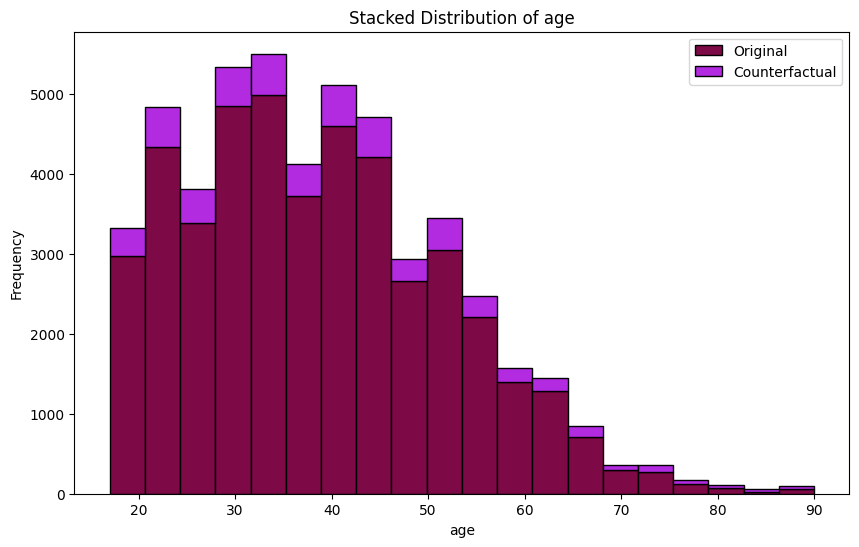

In [56]:
stacked_numerical_histogram(df, df_cf, 'age')

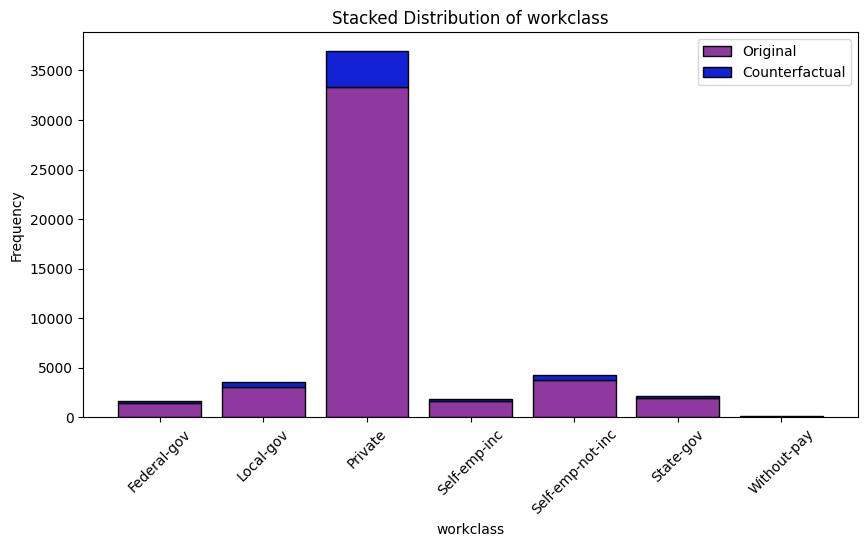

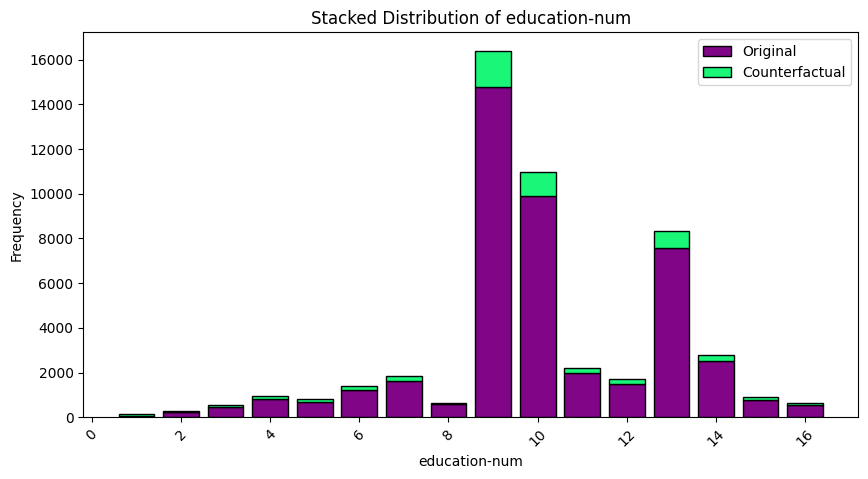

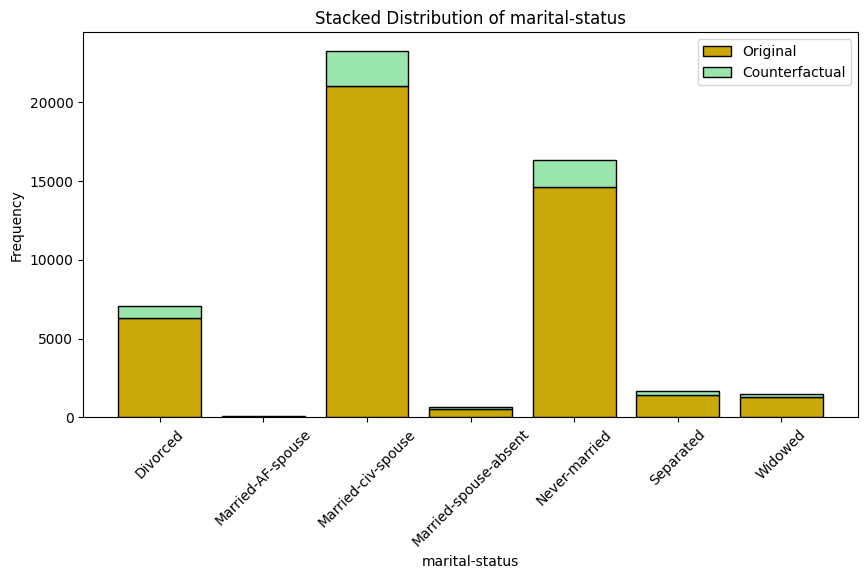

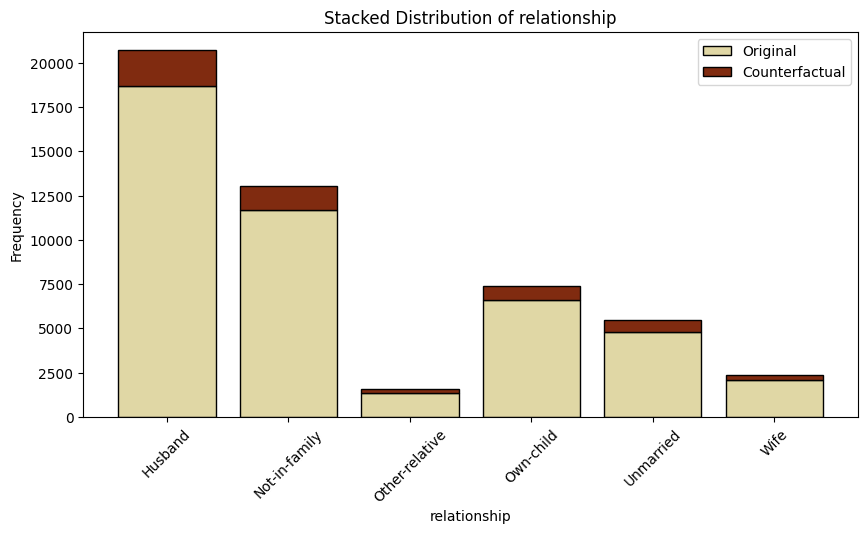

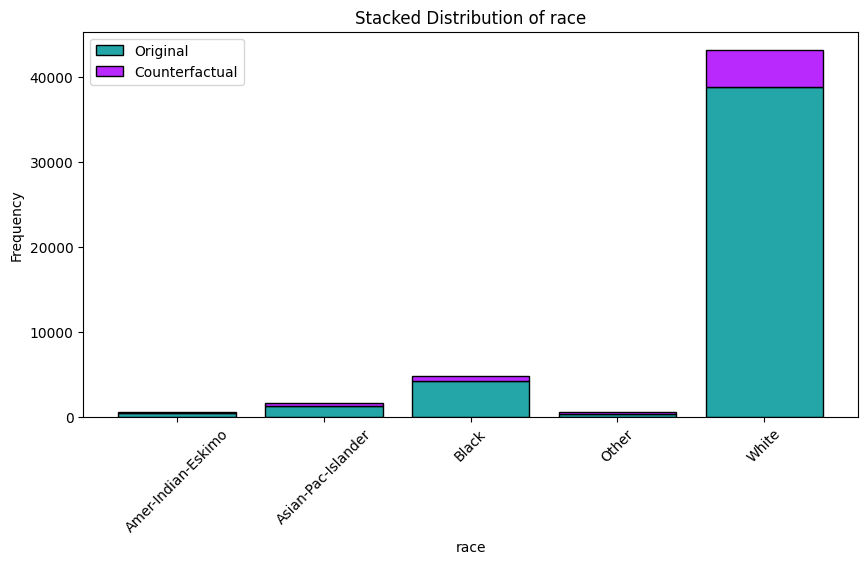

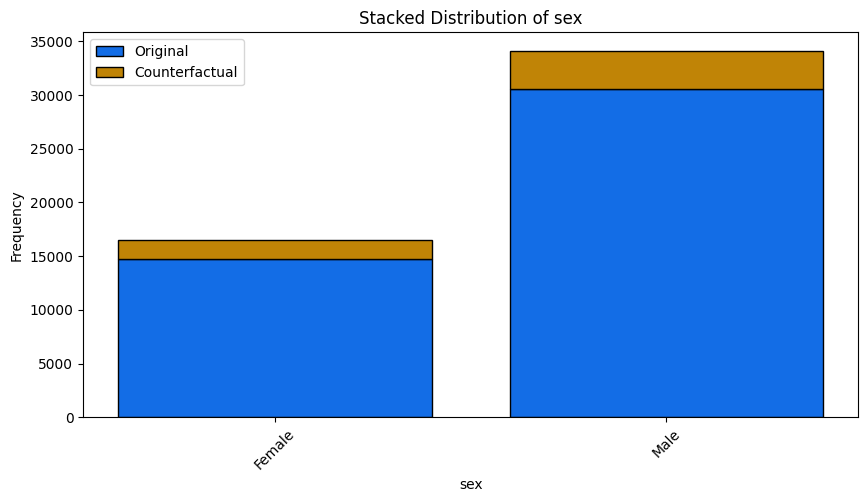

In [57]:
stacked_histogram(df, df_cf, 'workclass')
stacked_histogram(df, df_cf, 'education-num')
stacked_histogram(df, df_cf, 'marital-status')
stacked_histogram(df, df_cf, 'relationship')
stacked_histogram(df, df_cf, 'race')
stacked_histogram(df, df_cf, 'sex')


# Graphs for model performance metrics

In [180]:
# Load the dataframe from a csv file
df_performance = pd.read_excel('model_perf_metrics_merged_5400.xlsx')

In [148]:
df_performance.head()

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,Total CF Num,Precision (%),F1 (%),AUC(%),F1_average(%),F1_std(%),AUC_average(%),AUC_std(%)
0,0,RF default,0,0,0,0,0.710418,0.658146,0.765218,0.0,0.0,0.0,0.0
1,1,LR default,0,0,0,0,0.720688,0.383472,0.613885,0.0,0.0,0.0,0.0
2,2,LR _1_iterations_sample:5400_cf:1,1,5400,1,5400,0.771577,0.355259,0.604085,0.0,0.0,0.0,0.0
3,3,LR _2_iterations_sample:5400_cf:1,2,5400,1,5400,0.684316,0.421798,0.629182,0.0,0.0,0.0,0.0
4,4,LR _3_iterations_sample:5400_cf:1,3,5400,1,5400,0.771802,0.361840,0.606609,0.0,0.0,0.0,0.0


In [181]:
# Drop row at position 'row_position'
df_performance = df_performance.drop(df_performance.index[32])

In [178]:
df_performance.head()

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,Total CF Num,Precision (%),F1 (%),AUC(%),F1_average(%),F1_std(%),AUC_average(%),AUC_std(%)
2,2,LR _1_iterations_sample:5400_cf:1,1,5400,1,5400,0.771577,0.355259,0.604085,0.0,0.0,0.0,0.0
3,3,LR _2_iterations_sample:5400_cf:1,2,5400,1,5400,0.684316,0.421798,0.629182,0.0,0.0,0.0,0.0
4,4,LR _3_iterations_sample:5400_cf:1,3,5400,1,5400,0.771802,0.361840,0.606609,0.0,0.0,0.0,0.0
5,5,LR _4_iterations_sample:5400_cf:1,4,5400,1,5400,0.765818,0.358835,0.605314,0.0,0.0,0.0,0.0
6,6,LR _5_iterations_sample:5400_cf:1,5,5400,1,5400,0.766764,0.358677,0.605276,0.0,0.0,0.0,0.0


In [ ]:
def stacked_histogram(df_1, df_2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend((p1[0], p2[0]), ('Original', 'Counterfactual'))
    plt.show()

In [193]:
def distrubution_plot(df, name):
    lr_line = df[df['Model'] == 'LR default'][name].iloc[0]
    rf_line = df[df['Model'] == 'RF default'][name].iloc[0]
    df = df[(df['Model'] != 'RF default') & (df['Model'] != 'LR default')]
        
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()

    y = df[name]

    # combine x and x_2 for x-axis labels
    combined_x = [f"{i}-{j}-{k}" for i in x for j in x_2 for k in x_3]

    # plot lines
    plt.figure(figsize=(20,8))
    plt.plot(combined_x, y, label="{} Values".format(name))
    plt.axhline(y=lr_line, color='r', linestyle='--', label="default_lr_line")  # Plot lr_line as a horizontal line
    plt.axhline(y=rf_line, color='green', linestyle='--', label="default_rf_line")  # Plot lr_line as a horizontal line

    plt.title('Distribution of {}'.format(name))
    plt.xlabel('Sample Size- CF Num- Iteration')
    plt.legend()
    plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
    plt.show()


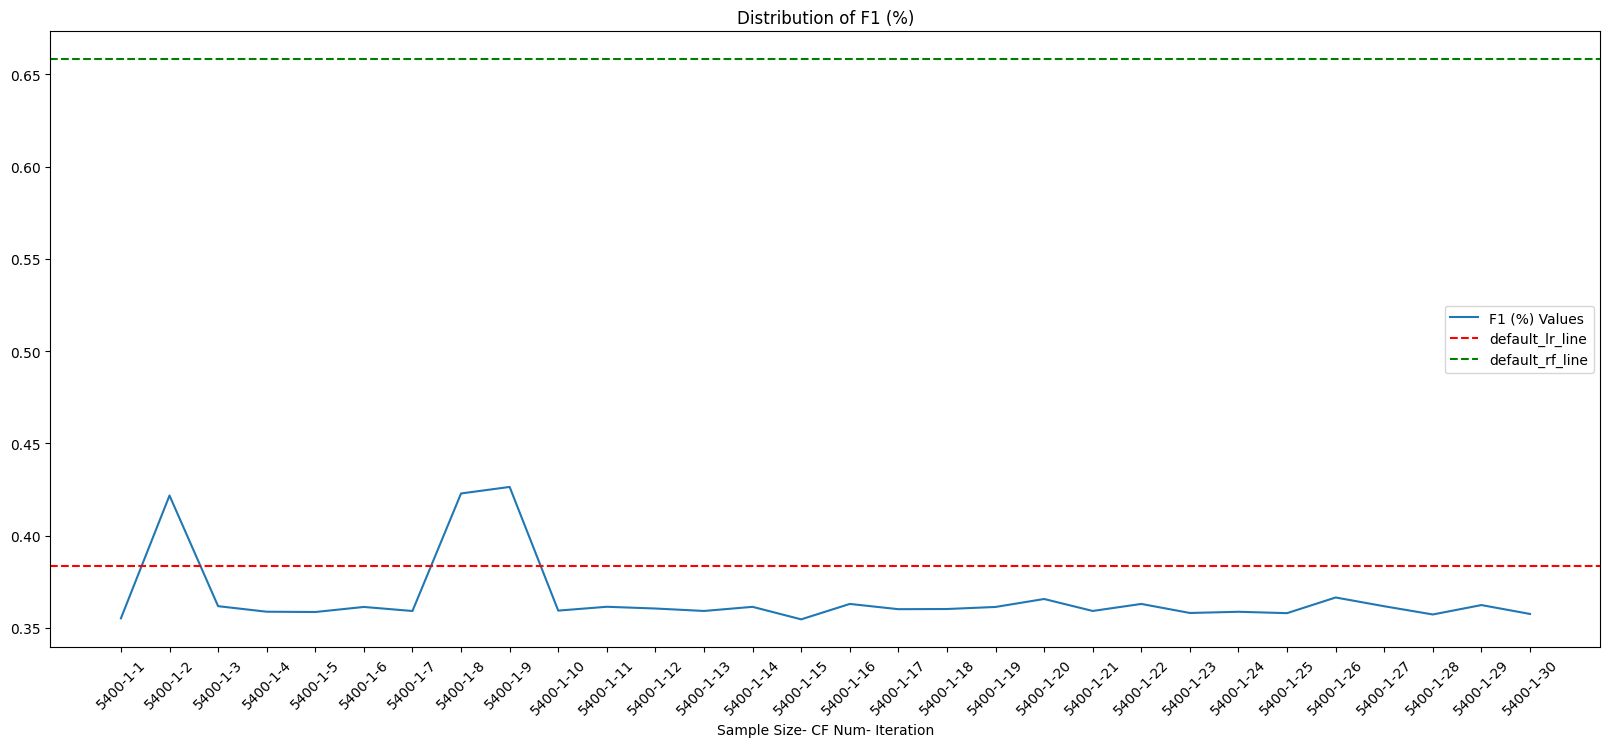

In [194]:
distrubution_plot(df_performance, 'F1 (%)')